# Table of Contents

1. [Importing Libraries & Dataset](#importing-libraries--dataset)  
2. [Building EDA and Preparing for Data Visualization](#building-eda-and-preparing-for-data-visualization)  
3. [Visualizations](#visualizations)  
4. [Conclusion & Actionable Insights](#conclusion--actionable-insights)


# 1. Importing Libraries & Dataset and Plan

First of all, I need to import every library that I need for my notebook:

1. `pandas` for data manipulation, data cleaning, and exploratory data analysis (EDA).
2. `matplotlib` for data visualization (creating bar charts, histograms) to gain better pattern insights.
3. Download the dataset.

## Plan & Aims

1. **Exploratory Data Analysis (EDA):**
   - Perform a brief EDA to understand the dataset better.
   - Examine data types, identify missing values (NAN), and detect any anomalies (if they exist).

2. **Data Visualization:**
   - Create visualizations to gain insights into the data.
   - **Sales Overview:** Identify which product categories contribute the most to sales.
   - **Total Quantity and Value by Business:** Highlight the top purchasing businesses.

3. **Conclusions:**
   - Summarize findings based on the graphs and charts from the visualization section.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset(Excel file)
filePath = "/home/mine/Documents/DATA/Kwanza Tukule Data Analyst Assessment/Case Study Data - Read Only.xlsx"
xls = pd.ExcelFile(filePath)

# Display datasheet name to understand the file structure
xls.sheet_names

['case_study_data_2025-01-16T06_4']

In [4]:
# Load the dataset from the sheet
df = pd.read_excel(xls, sheet_name=xls.sheet_names[0])

# Display the first few rows
df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0


## Data Quality Assesment
I will now inpect the dataset.

1. **Missing Values** - Checking for null values.
2. **Duplicates** - Identifying repeated rows.
3. **Inconsistent Data Types** - Ensuring proper data types for analysis.

Let proceed.

In [24]:
# Check missing values
missing_values = df.isnull().sum()

# Check duplicates
duplicate_rows = df.duplicated().sum()

# Check the data types on eacch column
data_types = df.dtypes

# Compile the findings
data_report = pd.DataFrame({
    "Missing Values" : missing_values,
    "Duplicates" : [duplicate_rows] + [None] * (len (df.columns) - 1),
    "Data Types" : data_types
})



# Display the results
from IPython.display import display, HTML

display(data_report)





,Missing Values,Duplicates,Data Types
DATE,0,3524.0,datetime64[ns]
ANONYMIZED CATEGORY,0,NaN,object
ANONYMIZED PRODUCT,0,NaN,object
ANONYMIZED BUSINESS,0,NaN,object
ANONYMIZED LOCATION,0,NaN,object
QUANTITY,0,NaN,int64
UNIT PRICE,0,NaN,float64
Month-Year,0,NaN,object
Total Value,0,NaN,float64


## Data quality Findings.

1. **Missing Values** - The `UNIT PRICE` column has 8 missing values.
2. **Duplicates** - The data contains the 3524 duplicate rows. They need to be looked at. It is a good idea to review the **Date** duplicates to understand them.
3. **Inconsistent Data Types**
- The **Date** column is correctly formatted as `datetime64[ns]`
- All categorical fields are stored as `object`, **QUANTITY** as `int64` and **UNIT  PRICE** as `float64` which is expected.


The duplicate rows contain important information, then removing them could lead to data loss.


In [ ]:
# Display duplicate rows
duplicate_rows_df = df[df.duplicated(keep=False)]  # keep = False to show all duplicates

# Show few duplicate rows(10 rows)
duplicate_rows_df.head(10)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
310,2024-05-17 20:27:00,Category-120,Product-1e80,Business-9909,Location-689f,1,1970.0
311,2024-05-17 20:27:00,Category-75,Product-8f75,Business-9909,Location-689f,1,4020.0
426,2024-01-31 19:34:00,Category-76,Product-e805,Business-bf85,Location-1ba8,5,7018.0
526,2024-02-05 18:24:00,Category-120,Product-29ee,Business-bfcd,Location-3e32,5,2290.0
570,2024-04-19 15:19:00,Category-75,Product-086d,Business-b48e,Location-03fc,3,2090.0
571,2024-04-19 15:19:00,Category-106,Product-21f4,Business-b48e,Location-03fc,2,850.0
572,2024-04-19 15:19:00,Category-120,Product-4156,Business-b48e,Location-03fc,3,2060.0
641,2024-01-02 21:12:00,Category-119,Product-66e0,Business-f9ff,Location-1979,1,1740.0
777,2024-10-16 11:54:00,Category-108,Product-d8c2,Business-c569,Location-f37d,1,2960.0
778,2024-10-16 11:54:00,Category-75,Product-e82e,Business-c569,Location-f37d,10,2240.0


In [19]:
# Create the Month-Year column
df['Month-Year'] = df['DATE'].dt.strftime('%B %Y')

# Handle missing values in UNIT PRICE (impute with median)
df.loc[:, 'UNIT PRICE'] = df['UNIT PRICE'].fillna(df['UNIT PRICE'].median())

# Now check the missing values
missing_values = df.isnull().sum()

data_report = pd.DataFrame({
    "Missing Values" : missing_values
})

# Display the DataFrame with the new column
display(df, data_report)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,August 2024
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,August 2024
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,August 2024
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,August 2024
...,...,...,...,...,...,...,...,...
333400,2024-01-09 20:49:00,Category-119,Product-e98d,Business-f9ff,Location-1979,1,1770.0,January 2024
333401,2024-08-20 20:24:00,Category-106,Product-21f4,Business-72bc,Location-689f,1,850.0,August 2024
333402,2024-08-20 20:24:00,Category-76,Product-6e9c,Business-72bc,Location-689f,1,2575.0,August 2024
333403,2024-10-10 18:19:00,Category-91,Product-523e,Business-2693,Location-b27b,1,1520.0,October 2024


,Missing Values
DATE,0
ANONYMIZED CATEGORY,0
ANONYMIZED PRODUCT,0
ANONYMIZED BUSINESS,0
ANONYMIZED LOCATION,0
QUANTITY,0
UNIT PRICE,0
Month-Year,0


## Next Steps:

I have completed the data cleaning and preparation steps.
- Handling missing values in `UNIT PRICE` by filling them with the median value.
- Creating a "Month-Year" column for time-based analysis.

Next is to proceed with the exploratory data analysis (EDA), starting with sales aggregation by category and business. ​

# 2. Building EDA and Preparing for Data Visualization
Calculate total Quantity and Value per category and business

In [25]:

# Compute Total Value (Quantity * Unit Price)
df['Total Value'] = df['QUANTITY'] * df['UNIT PRICE']

# Group by Anonymized Category
category_sales = df.groupby('ANONYMIZED CATEGORY').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('Total Value', 'sum')
).reset_index()

# Group by Anonymized Business
business_sales = df.groupby('ANONYMIZED BUSINESS').agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('Total Value', 'sum')
).reset_index()

# Display results
display(HTML("<h3>Sales by Category</h3>"))
display(category_sales)

display(HTML("<h3>Sales by Business</h3>"))
display(business_sales)

,ANONYMIZED CATEGORY,Total_Quantity,Total_Value
0,Category-100,77704,136417463.0
1,Category-101,19803,36003467.0
2,Category-102,1941,501824.0
3,Category-104,1222,1564133.0
4,Category-105,1656,2844024.0
5,Category-106,6582,5986975.0
6,Category-107,2757,4213107.0
7,Category-108,9782,5159195.0
8,Category-109,1453,1269541.0
9,Category-110,10614,5583150.0


,ANONYMIZED BUSINESS,Total_Quantity,Total_Value
0,Business-0000,8,10445.0
1,Business-0005,1,2645.0
2,Business-0029,26,77340.0
3,Business-003d,98,221761.0
4,Business-0072,127,225056.0
...,...,...,...
4795,Business-ffa9,3,6740.0
4796,Business-ffae,6,10530.0
4797,Business-ffb1,266,438115.0
4798,Business-ffd2,39,78548.0


Sales Overview Insights
- Total Quantity and Value by Category: This helps identify which product categories contribute the most to sales.
- Total Quantity and Value by Business: This highlights the top purchasing businesses.


Next:
1. I will create visualizations to better illustrate these sales distributions.
2. I will analyze sales trends over time using the "Month-Year" column and generate a time series plot.

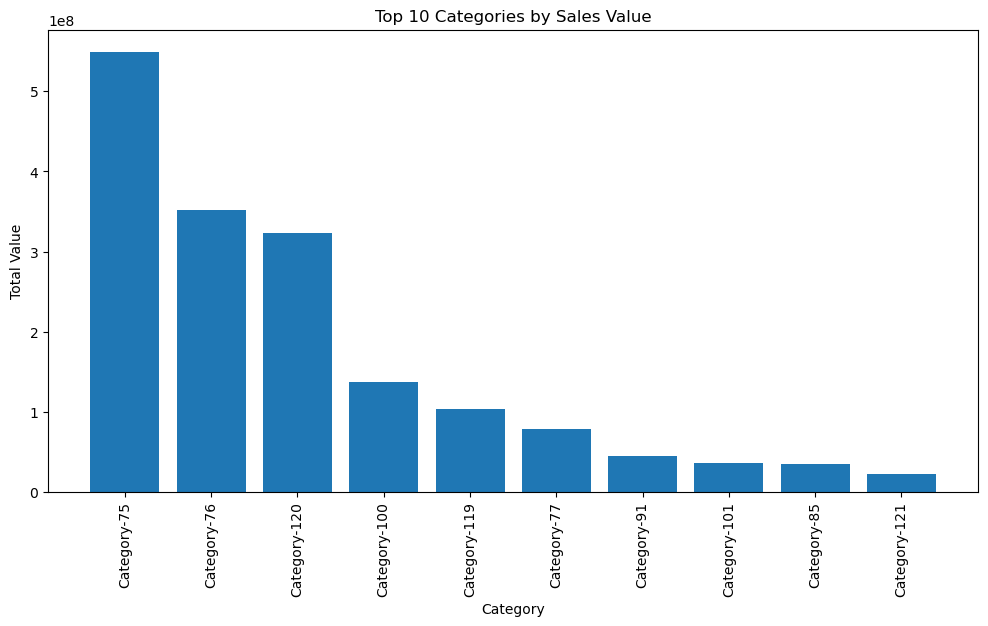

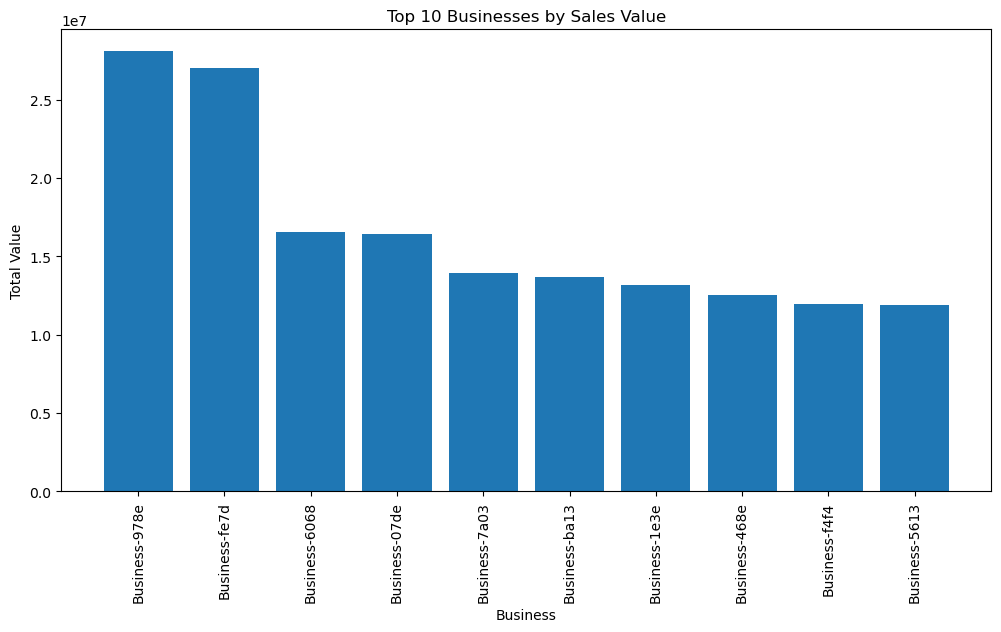

In [26]:
#Top categories by total value
top_categories = category_sales.sort_values(by="Total_Value", ascending=False).head(10)

#Plot
plt.figure(figsize=(12, 6))
plt.bar(top_categories["ANONYMIZED CATEGORY"], top_categories["Total_Value"])
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Total Value")
plt.title("Top 10 Categories by Sales Value")
plt.show()

#Top businesses by total value
top_businesses = business_sales.sort_values(by="Total_Value", ascending=False).head(10)

#Plot
plt.figure(figsize=(12, 6))
plt.bar(top_businesses["ANONYMIZED BUSINESS"], top_businesses["Total_Value"])
plt.xticks(rotation=90)
plt.xlabel("Business")
plt.ylabel("Total Value")
plt.title("Top 10 Businesses by Sales Value")
plt.show()

In [27]:
#Aggregate sales by Month-Year
monthly_sales = df.groupby("Month-Year").agg(
    Total_Quantity=('QUANTITY', 'sum'),
    Total_Value=('Total Value', 'sum')
).reset_index()

#Convert Month-Year to datetime for proper sorting
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales['Month-Year'], format='%B-%Y')
monthly_sales = monthly_sales.sort_values('Month-Year')

#Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month-Year'], monthly_sales['Total_Value'], marker='o', linestyle='-')
plt.xlabel("Month-Year")
plt.ylabel("Total Sales Value")
plt.title("Sales Value Trends Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month-Year'], monthly_sales['Total_Quantity'], marker='o', linestyle='-', color='orange')
plt.xlabel("Month-Year")
plt.ylabel("Total Quantity Sold")
plt.title("Sales Quantity Trends Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

ValueError: time data "April 2024" doesn't match format "%B-%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.